# Построение модели по данным о ценах на жилье

## Импорт пакетов
- `matplotlib.pyplot`, `seaborn` - рисование графиков
- `pandas` - работа с таблицами

In [5]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns

import pandas as pd

import numpy as np

# импортировать из пакета с моделями модель линейной регрессии
from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import PolynomialFeatures

import xgboost as xg 

from sklearn.model_selection import train_test_split

%matplotlib inline

## Анализ данных

`Daegu_Real_Estate_data.csv`

[Dataset source](https://www.kaggle.com/harlfoxem/housesalesprediction)

### Загрузка данных

In [2]:
import os
notebook_path = os.path.abspath("Notebook.ipynb")    # получить "точку отсчета" для поиска файла
data_csv = os.path.join(os.path.dirname(notebook_path), "data/Daegu_Real_Estate_data.csv")
df = pd.read_csv(data_csv)
df

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

## Простая линейная регрессия

In [6]:
# разделить независимую и зависимую переменные / train и test
Y = df['SalePrice'].copy()
X = df[['Size(sqf)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
simple_regr = linear_model.LinearRegression()
simple_regr.fit(X_train, y_train)
print('Coefficients: ', simple_regr.coef_)
print('Intercept: ', simple_regr.intercept_)

Coefficients:  [194.72965485]
Intercept:  35466.308960636845


Text(0, 0.5, 'price')

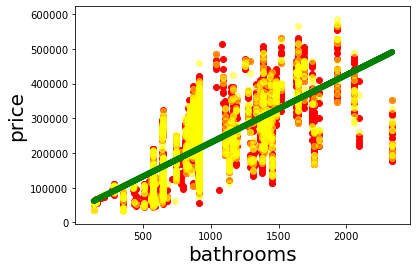

In [8]:
plt.scatter(X_train, y_train,  color='red')
plt.scatter(X_test, y_test,  color='yellow', alpha=0.5)

plt.plot(X_train, simple_regr.coef_[0]*X_train + simple_regr.intercept_, '-g', linewidth=6)
plt.xlabel("bathrooms", fontsize=20)
plt.ylabel("price", fontsize=20)

In [9]:
y_predicted = simple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

R2: 0.4920533642120909
MSE: 5591073115.885193


## Множественная линейная регрессия (N-D)

In [10]:
# выбрать даннные для обучения / предсказания
Y = df['SalePrice'].copy()
X = df[['Size(sqf)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [11]:
multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

Coefficients:  [1.77700140e+02 1.74656128e+04 1.32813758e+01]
Intercept:  -56854.566231458884
R2: 0.656401974110501
MSE: 3782054156.618415


---

In [17]:
df_num = df.select_dtypes(include=[np.number])
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   N_Parkinglot(Ground)                5891 non-null   float64
 7   N_Parkinglot(Basement)              5891 non-null   float64
 8   N_APT                               5891 non-null   float64
 9   N_manager                           5891 non-null   float64
 10  N_elevators                         5891 non-null   float64
 11  N_FacilitiesNearBy(PublicOffice)    5891 no

In [19]:
df_obj = df.select_dtypes(exclude=[np.number])
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   HallwayType    5891 non-null   object
 1   HeatingType    5891 non-null   object
 2   AptManageType  5891 non-null   object
 3   TimeToBusStop  5891 non-null   object
 4   TimeToSubway   5891 non-null   object
 5   SubwayStation  5891 non-null   object
dtypes: object(6)
memory usage: 276.3+ KB


In [23]:
df_obj.columns

<bound method IndexOpsMixin.tolist of Index(['HallwayType', 'HeatingType', 'AptManageType', 'TimeToBusStop',
       'TimeToSubway', 'SubwayStation'],
      dtype='object')>

In [29]:
# разделить независимую и зависимую переменные / train и test
Y = df['SalePrice'].copy()
X = df.drop(['SalePrice'], axis=1)
X = X.drop(df_obj.columns, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [30]:
multiple_regr = linear_model.LinearRegression()
multiple_regr.fit(X_train, y_train)

print('Coefficients: ', multiple_regr.coef_)
print('Intercept: ', multiple_regr.intercept_)

y_predicted = multiple_regr.predict(X_test)

print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

Coefficients:  [  1020.97952248  12298.73093069   2146.58433201    166.11741217
   1135.0036352      48.9352802      98.08737729  -9004.34477137
  -4108.74639346   1413.09997062   2138.50923581 -16882.64277154
  35108.52885044 -16140.14871111  11838.29265656 -22164.98075753
  -7623.92437415   2832.03076687   8872.09717354  -5617.82176413
  10325.02904244  -6102.44149737  -1537.61819786]
Intercept:  -26754040.053671937
R2: 0.8579561677007929
MSE: 1563505683.6502156


## XGBoost for Regression

In [45]:
xgb_r = xg.XGBRegressor(n_estimators=750, 
                        learning_rate=0.05, 
                        max_depth=5) 

# Fitting the model 
xgb_r.fit(X_train, y_train) 

# Predict the model 
y_predicted = xgb_r.predict(X_test) 

# вывести результаты оценки предсказания
print(f'R2: {r2_score(y_test, y_predicted)}')
print(f"MSE: {mean_squared_error(y_test, y_predicted, squared=True)}")

R2: 0.9792919717275327
MSE: 227937527.2908114
